In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno


In [147]:
train=pd.read_csv('/Users/rouzbehrahimi/desktop/IE-BD/kaggle/Mercedes_Benz/train.csv')

In [148]:
test=pd.read_csv('/Users/rouzbehrahimi/desktop/IE-BD/kaggle/Mercedes_Benz/test.csv')

In [149]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [150]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [151]:
train.shape

(4209, 378)

In [152]:
test.shape


(4209, 377)

In [153]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
train.select_dtypes(include=numerics).shape

(4209, 370)

In [154]:
train.select_dtypes('object').shape

(4209, 8)

In [155]:
train.isna().sum().sum()

0

#### The dataset does not any null value

### EDA

In [156]:
cat_features=train.columns[2:10]
cat_features

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

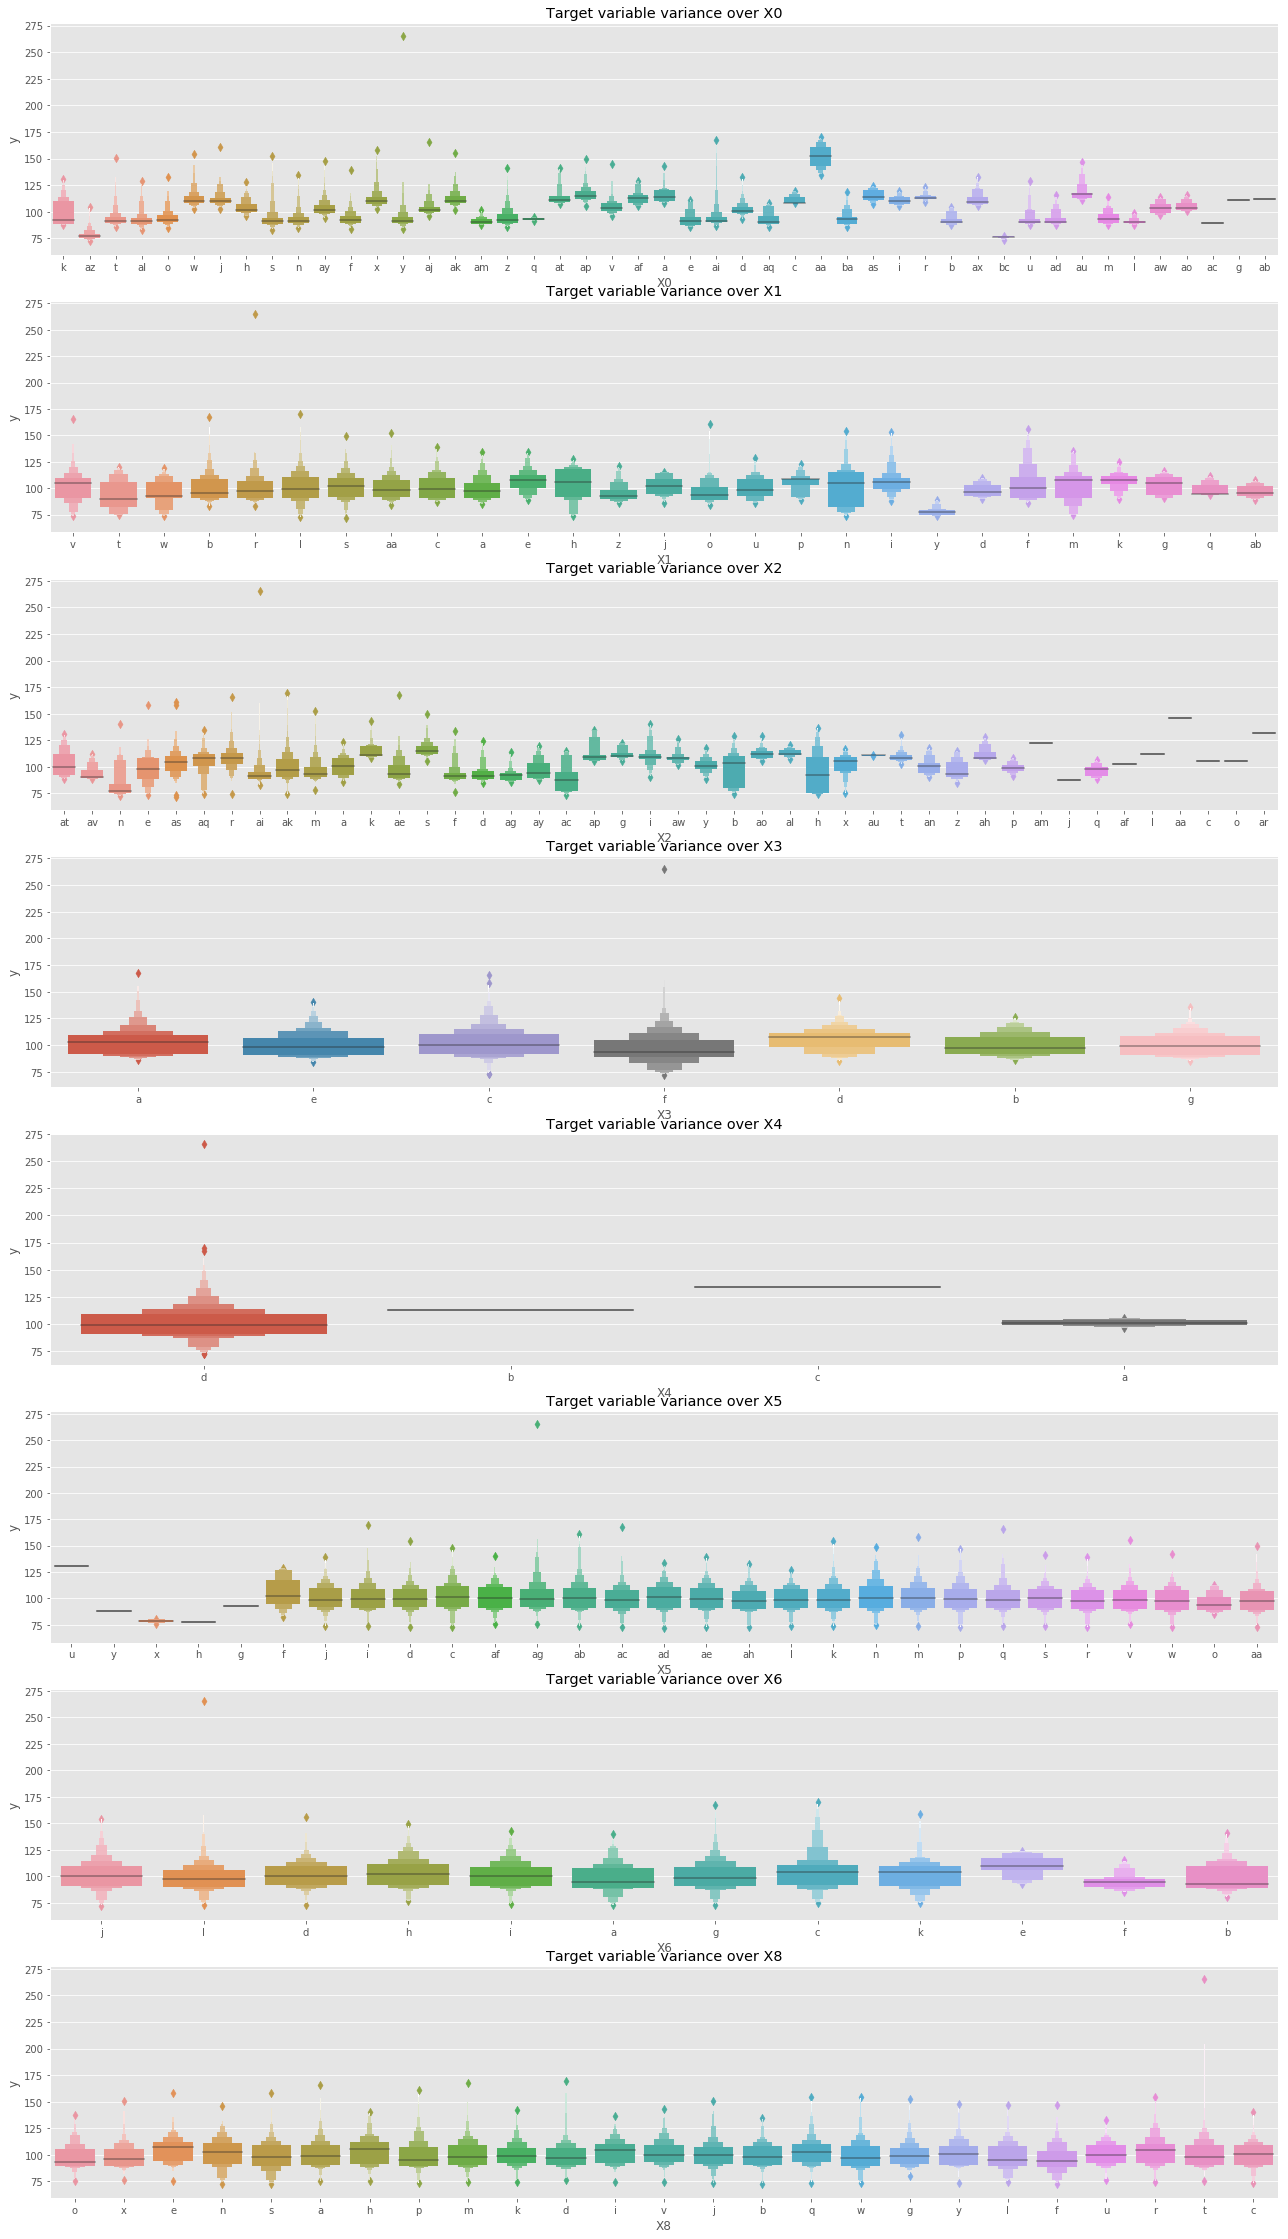

In [157]:
counter = 1
plt.figure(figsize=(22, 40))
for i in cat_features:

    plt.subplot(len(cat_features), 1, counter)
    sns.boxenplot(train[i], train["y"])
    plt.title("Target variable variance over " + str(i))
    counter += 1

####  As could be seen in above visualozations some features are not important for predicting 'y', because the target variable is almost constant over different level of those categorical features.


### Bucketizing X0

In [158]:
train.groupby("X0").mean().y.min(), train.groupby("X0").mean().y.max()

(76.19500000000001, 152.17000000000002)

In [75]:
pd.DataFrame({'test':test.iloc[:,1:10].nunique(),'train':train.iloc[:,1:10].nunique()})

,test,train
X0,49.0,47.0
X1,27.0,27.0
X10,2.0,NaN
X2,45.0,44.0
X3,7.0,7.0
X4,4.0,4.0
X5,32.0,29.0
X6,12.0,12.0
X8,25.0,25.0
y,NaN,2545.0


In [186]:
for col in train.columns[2:10]:
    print("for"+ col)
    for level in test[col].unique():
        if level not in train[col].unique():
            print("missing values for {} are {}" .format(col,level))

forX0
missing values for X0 are av
missing values for X0 are ag
missing values for X0 are an
missing values for X0 are ae
missing values for X0 are p
missing values for X0 are bb
forX1
forX2
missing values for X2 are aj
missing values for X2 are ax
missing values for X2 are ab
missing values for X2 are w
missing values for X2 are ad
missing values for X2 are u
forX3
forX4
forX5
missing values for X5 are t
missing values for X5 are b
missing values for X5 are a
missing values for X5 are z
forX6
forX8


In [176]:
train["X0_new"] = "asghar"
for i in train["X0"].unique():
    if train[train["X0"] == i].y.mean() > 75 and train[train["X0"] == i].y.mean() < 82:
        train.loc[train["X0"] == i, "X0_new"] = "a"
    elif (
        train[train["X0"] == i].y.mean() >= 82 and train[train["X0"] == i].y.mean() < 89
    ):
        train.loc[train["X0"] == i, "X0_new"] = "b"
    elif (
        train[train["X0"] == i].y.mean() >= 89 and train[train["X0"] == i].y.mean() < 96
    ):
        train.loc[train["X0"] == i, "X0_new"] = "c"
    elif (
        train[train["X0"] == i].y.mean() >= 96
        and train[train["X0"] == i].y.mean() < 103
    ):
        train.loc[train["X0"] == i, "X0_new"] = "d"
    elif (
        train[train["X0"] == i].y.mean() >= 103
        and train[train["X0"] == i].y.mean() < 110
    ):
        train.loc[train["X0"] == i, "X0_new"] = "e"
    elif (
        train[train["X0"] == i].y.mean() >= 110
        and train[train["X0"] == i].y.mean() < 117
    ):
        train.loc[train["X0"] == i, "X0_new"] = "f"
    elif (
        train[train["X0"] == i].y.mean() >= 117
        and train[train["X0"] == i].y.mean() < 124
    ):
        train.loc[train["X0"] == i, "X0_new"] = "g"
    elif (
        train[train["X0"] == i].y.mean() >= 124
        and train[train["X0"] == i].y.mean() < 131
    ):
        train.loc[train["X0"] == i, "X0_new"] = "h"
    elif (
        train[train["X0"] == i].y.mean() >= 131
        and train[train["X0"] == i].y.mean() < 138
    ):
        train.loc[train["X0"] == i, "X0_new"] = "i"
    elif (
        train[train["X0"] == i].y.mean() >= 138
        and train[train["X0"] == i].y.mean() < 145
    ):
        train.loc[train["X0"] == i, "X0_new"] = "j"
    elif (
        train[train["X0"] == i].y.mean() >= 145
        and train[train["X0"] == i].y.mean() < 153
    ):
        train.loc[train["X0"] == i, "X0_new"] = "k"

In [196]:
X0_new_uniq=train['X0_new'].unique()

In [202]:
str(train[train['X0_new']=='a'].X0.unique())

"['az' 'bc']"

In [203]:
for i in X0_new_uniq:
    mapping_val=train[train['X0_new']==i].X0.unique()
    print(i+" represents   "+str(mapping_val))


d represents   ['k' 'd']
a represents   ['az' 'bc']
c represents   ['t' 'al' 'o' 's' 'n' 'f' 'y' 'am' 'z' 'q' 'e' 'ai' 'aq' 'ba' 'b' 'u' 'ad'
 'm' 'l' 'ac']
f represents   ['w' 'j' 'x' 'ak' 'at' 'ap' 'af' 'a' 'c' 'as' 'i' 'r' 'ax' 'g' 'ab']
e represents   ['h' 'ay' 'aj' 'v' 'aw' 'ao']
k represents   ['aa']
g represents   ['au']


In [208]:
test["X0_new"] = test["X0"].map(
    {
        "k": "d",
        "d": "d",
        "az": "a",
        "bc": "a",
        "t": "c",
        "al": "c",
        "o": "c",
        "s": "c",
        "n": "c",
        "f": "c",
        "y": "c",
        "am": "c",
        "z": "c",
        "q": "c",
        "e": "c",
        "ai": "c",
        "aq": "c",
        "ba": "c",
        "b": "c",
        "u": "c",
        "ad": "c",
        "m": "c",
        "l": "c",
        "ac": "c",
        "w": "f",
        "j": "f",
        "x": "f",
        "ak": "f",
        "at": "f",
        "ap": "f",
        "af": "f",
        "a": "f",
        "c": "f",
        "as": "f",
        "i": "f",
        "r": "f",
        "ax": "f",
        "g": "f",
        "ab": "f",
        "h": "e",
        "ay": "e",
        "aj": "e",
        "v": "e",
        "aw": "e",
        "ao": "e",
        "aa": "k",
        "au": "g",
        "av": "ac",
        "ag": "ag",
        "an": "an",
        "ae": "ae",
        "p": "p",
        "bb": "bb",
    }
)

In [209]:
test['X0_new'].unique()

array(['a', 'c', 'f', 'e', 'd', 'ac', 'ag', 'g', 'an', 'ae', 'p', 'bb'],
      dtype=object)

### Bucketizing X2

In [211]:
train.groupby("X2").mean().y.min(), train.groupby("X2").mean().y.max()

(83.36992700729928, 146.3)

In [212]:
train["X2_new"] = "asghar"
for i in train["X2"].unique():
    if train[train["X2"] == i].y.mean() > 83 and train[train["X2"] == i].y.mean() < 89:
        train.loc[train["X2"] == i, "X2_new"] = "a"
    elif (
        train[train["X2"] == i].y.mean() >= 89 and train[train["X2"] == i].y.mean() < 95
    ):
        train.loc[train["X2"] == i, "X2_new"] = "b"
    elif (
        train[train["X2"] == i].y.mean() >= 95
        and train[train["X2"] == i].y.mean() < 101
    ):
        train.loc[train["X2"] == i, "X2_new"] = "c"
    elif (
        train[train["X2"] == i].y.mean() >= 101
        and train[train["X2"] == i].y.mean() < 107
    ):
        train.loc[train["X2"] == i, "X2_new"] = "d"
    elif (
        train[train["X2"] == i].y.mean() >= 107
        and train[train["X2"] == i].y.mean() < 113
    ):
        train.loc[train["X2"] == i, "X2_new"] = "e"
    elif (
        train[train["X2"] == i].y.mean() >= 113
        and train[train["X2"] == i].y.mean() < 119
    ):
        train.loc[train["X2"] == i, "X2_new"] = "f"
    elif (
        train[train["X2"] == i].y.mean() >= 119
        and train[train["X2"] == i].y.mean() < 125
    ):
        train.loc[train["X2"] == i, "X2_new"] = "g"
    elif (
        train[train["X2"] == i].y.mean() >= 125
        and train[train["X2"] == i].y.mean() < 131
    ):
        train.loc[train["X2"] == i, "X2_new"] = "h"
    elif (
        train[train["X2"] == i].y.mean() >= 131
        and train[train["X2"] == i].y.mean() < 137
    ):
        train.loc[train["X2"] == i, "X2_new"] = "i"
    elif (
        train[train["X2"] == i].y.mean() >= 137
        and train[train["X2"] == i].y.mean() < 147
    ):
        train.loc[train["X2"] == i, "X2_new"] = "b"

In [213]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X377,X378,X379,X380,X382,X383,X384,X385,X0_new,X2_new
0,0,130.81,k,v,at,a,d,u,j,o,...,1,0,0,0,0,0,0,0,d,d
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,d,c
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,1,0,0,0,a,a
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,a,a
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,a,a


In [214]:
X2_new_uniq=train['X2_new'].unique()
for i in X2_new_uniq:
    mapping_val=train[train['X2_new']==i].X2.unique()
    print(i+" represents   "+str(mapping_val))



d represents   ['at' 'as' 'aq' 'y' 'x' 'an' 'af' 'c' 'o']
c represents   ['av' 'e' 'ak' 'm' 'a' 'ae' 'ay' 'b' 'h' 'z' 'p' 'q']
a represents   ['n' 'ac' 'j']
e represents   ['r' 'ap' 'g' 'i' 'aw' 'ao' 'au' 't' 'ah' 'l']
b represents   ['ai' 'f' 'd' 'ag' 'aa']
f represents   ['k' 's' 'al']
g represents   ['am']
i represents   ['ar']


In [215]:
test["X2_new"] = test["X2"].map(
    {
        "at": "d",
        "as": "d",
        "aq": "d",
        "y": "d",
        "x": "d",
        "an": "d",
        "af": "d",
        "c": "d",
        "o": "d",
        "av": "c",
        "e": "c",
        "ak": "c",
        "m": "c",
        "a": "c",
        "ae": "c",
        "ay": "c",
        "b": "c",
        "h": "c",
        "z": "c",
        "p": "c",
        "q": "c",
        "n": "a",
        "ac": "a",
        "j": "a",
        "r": "e",
        "ap": "e",
        "g": "e",
        "i": "e",
        "aw": "e",
        "ao": "e",
        "au": "e",
        "t": "e",
        "ah": "e",
        "l": "e",
        "ai": "b",
        "f": "b",
        "d": "b",
        "ag": "b",
        "aa": "b",
        "k": "f",
        "s": "f",
        "al": "f",
        "am": "g",
        "ar": "i",
        "aj": "aj",
        "ax": "ax",
        "ab": "ab",
        "w": "w",
        "ad": "ad",
        "u": "u",
    }
)

In [217]:
test['X2_new'].unique()

array(['a', 'b', 'd', 'c', 'f', 'e', 'aj', 'ax', 'g', 'ab', 'w', 'ad',
       'u'], dtype=object)

### Bucketizing X1

In [277]:
train.groupby("X1").mean().y.min(), train.groupby("X1").mean().y.max()

(77.95521739130434, 107.33787878787881)

In [278]:
train["X1_new"] = "asghar"
for i in train["X1"].unique():
    if train[train["X1"] == i].y.mean() > 77 and train[train["X1"] == i].y.mean() < 87:
        train.loc[train["X1"] == i, "X1_new"] = "a"
    elif (
        train[train["X1"] == i].y.mean() >= 87 and train[train["X1"] == i].y.mean() < 97
    ):
        train.loc[train["X1"] == i, "X1_new"] = "b"
    elif (
        train[train["X1"] == i].y.mean() >= 97
        and train[train["X1"] == i].y.mean() < 108
    ):
        train.loc[train["X1"] == i, "X1_new"] = "c"

In [285]:
X1_new_uniq = train["X1_new"].unique()
for i in X1_new_uniq:
    mapping_val = train[train["X1_new"] == i].X1.unique()
    print(i + " represents   " + str(mapping_val))

c represents   ['v' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'j' 'u' 'p' 'n' 'i' 'd' 'f' 'm'
 'k' 'g' 'q' 'ab']
b represents   ['t' 'w' 'z' 'o']
a represents   ['y']


In [286]:
test["X1_new"] = test["X1"].map(
    {
        "v": "c",
        "b": "c",
        "r": "c",
        "l": "c",
        "s": "c",
        "aa": "c",
        "c": "c",
        "a": "c",
        "e": "c",
        "h": "c",
        "j": "c",
        "u": "c",
        "p": "c",
        "n": "c",
        "i": "c",
        "d": "c",
        "f": "c",
        "m": "c",
        "k": "c",
        "g": "c",
        "q": "c",
        "ab": "c",
        "t": "b",
        "w": "b",
        "z": "b",
        "o": "b",
        "y": "a",
    }
)

In [287]:
test["X1_new"].unique()

array(['c', 'b', 'a'], dtype=object)

### Merging both dataset

In [288]:
features_to_remove = ["X8", "X5", "X3", "X2_new", "X0_new","X1_new"]

In [179]:
train["X0_new"].unique()

array(['d', 'a', 'c', 'f', 'e', 'k', 'g'], dtype=object)

In [178]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,X0_new
0,0,130.81,k,v,at,a,d,u,j,o,...,0,1,0,0,0,0,0,0,0,d
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,d
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,1,0,0,0,a
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,a
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,a


In [289]:
test['y']=0
df=train.append(test,sort=False)
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X378,X379,X380,X382,X383,X384,X385,X0_new,X2_new,X1_new
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,0,d,d,c
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,d,c,b
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,1,0,0,0,a,a,b
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,a,a,b
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,a,a,c


In [290]:
df['X0']=df['X0_new']
df['X2']=df['X2_new']
df['X1']=df['X1_new']
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X378,X379,X380,X382,X383,X384,X385,X0_new,X2_new,X1_new
0,0,130.81,d,c,d,a,d,u,j,o,...,0,0,0,0,0,0,0,d,d,c
1,6,88.53,d,b,c,e,d,y,l,o,...,0,0,0,0,0,0,0,d,c,b
2,7,76.26,a,b,a,c,d,x,j,x,...,0,0,0,1,0,0,0,a,a,b
3,9,80.62,a,b,a,f,d,x,l,e,...,0,0,0,0,0,0,0,a,a,b
4,13,78.02,a,c,a,f,d,h,d,n,...,0,0,0,0,0,0,0,a,a,c


In [220]:
def type_shifter(df, features, new_type):
    """this function takes the selected features of a data frame and 
    cast them to the new_type"""
    for i in features:
        df[i] = df[i].astype(new_type)
    return df.info()

In [291]:
type_shifter(df, cat_features, "category")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8418 entries, 0 to 4208
Columns: 381 entries, ID to X1_new
dtypes: category(8), float64(1), int64(369), object(3)
memory usage: 24.1+ MB


In [292]:
df.select_dtypes("category").columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [293]:
df.shape

(8418, 381)

In [294]:
df.drop(features_to_remove, axis=1, inplace=True)

In [295]:
df.shape

(8418, 375)

In [231]:
from sklearn.decomposition import PCA

In [296]:
pca = PCA()
principalComponents = pca.fit_transform(
    df.select_dtypes(include=numerics).drop(["y", "ID"], axis=1)
)
variance = pca.explained_variance_ratio_  # calculate variance ratios
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)

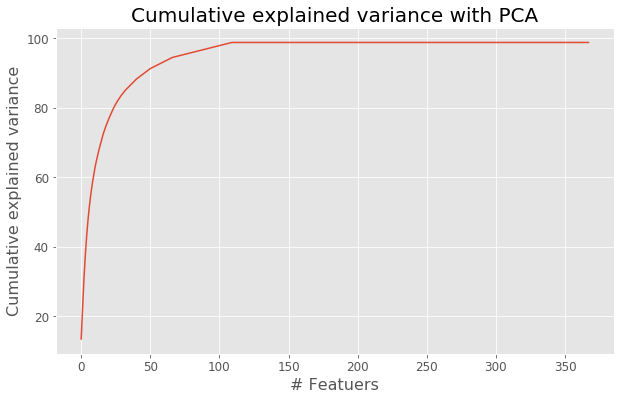

In [297]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
plt.title("Cumulative explained variance with PCA", fontsize=20)
plt.xlabel("# Featuers", fontsize=16)
plt.ylabel("Cumulative explained variance", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(var)

#### It seems that we cna explain 366 variables by only 100 new one 

In [298]:
principalComponents[:,:100].shape

(8418, 100)

In [299]:
principalDf = pd.DataFrame(
    data=principalComponents[:, :100], columns=["PC{}".format(i) for i in range(1, 101)]
)

In [300]:
principalDf.shape

(8418, 100)

In [301]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,0.717951,2.261372,-1.075744,0.942154,1.223198,-0.059235,0.597748,-0.915438,0.079418,-0.666961,...,0.193173,-0.128277,-0.448257,0.261121,-0.378422,-0.097249,0.173570,-0.432901,0.518172,-0.184147
1,-0.167951,0.086776,-1.362879,-0.681619,0.113824,-0.029079,1.249609,-0.506130,-0.122325,0.467179,...,0.004307,0.063464,-0.177404,-0.308979,-0.326524,0.175706,-0.012268,-0.075393,-0.129021,-0.200998
2,-0.838104,2.166248,-2.132233,2.307177,-1.005637,3.475150,-0.848841,0.497725,-1.030428,-0.198819,...,-0.292925,0.450548,0.157809,-0.128163,1.026742,-0.597846,-0.039480,0.329075,-0.345632,0.195720
3,-0.437887,1.129920,-2.239765,2.670459,-1.764832,3.345078,0.150580,-0.030701,-1.107734,0.116922,...,0.027857,-0.052338,0.071269,-0.187180,0.103379,-0.216673,0.306872,0.101847,-0.220385,0.311627
4,-0.420940,0.880172,-2.147508,2.855561,-2.083166,3.374394,-0.098551,0.122238,-1.870083,-0.425676,...,-0.061144,0.025249,0.141818,-0.304652,0.138629,-0.184040,0.098136,0.025273,-0.188131,0.130438


In [302]:
categorical_features = df.select_dtypes("category")
categorical_features.head()

,X0,X1,X2,X4,X6
0,d,c,d,d,j
1,d,b,c,d,l
2,a,b,a,d,j
3,a,b,a,d,l
4,a,c,a,d,d


In [303]:
dummy = df[["ID", "y"]]
dummy.head()

,ID,y
0,0,130.81
1,6,88.53
2,7,76.26
3,9,80.62
4,13,78.02


In [304]:
df_merged = pd.concat([dummy, categorical_features], axis=1)

In [241]:
df_merged.head()

,ID,y,X0,X1,X2,X4,X6
0,0,130.81,d,v,d,d,j
1,6,88.53,d,t,c,d,l
2,7,76.26,a,w,a,d,j
3,9,80.62,a,t,a,d,l
4,13,78.02,a,v,a,d,d


In [324]:
df_merged.nunique()

ID    8418
y     2546
X0      13
X1       3
X2      14
X4       4
X6      12
dtype: int64

In [243]:
df_merged.shape

(8418, 7)

In [244]:
principalDf.shape

(8418, 100)

In [305]:
df_merged.reset_index(drop=True,inplace=True)

In [246]:
df_merged.head()

,ID,y,X0,X1,X2,X4,X6
0,0,130.81,d,v,d,d,j
1,6,88.53,d,t,c,d,l
2,7,76.26,a,w,a,d,j
3,9,80.62,a,t,a,d,l
4,13,78.02,a,v,a,d,d


In [306]:
principalDf.reset_index(drop=True, inplace=True)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,0.717951,2.261372,-1.075744,0.942154,1.223198,-0.059235,0.597748,-0.915438,0.079418,-0.666961,...,0.193173,-0.128277,-0.448257,0.261121,-0.378422,-0.097249,0.173570,-0.432901,0.518172,-0.184147
1,-0.167951,0.086776,-1.362879,-0.681619,0.113824,-0.029079,1.249609,-0.506130,-0.122325,0.467179,...,0.004307,0.063464,-0.177404,-0.308979,-0.326524,0.175706,-0.012268,-0.075393,-0.129021,-0.200998
2,-0.838104,2.166248,-2.132233,2.307177,-1.005637,3.475150,-0.848841,0.497725,-1.030428,-0.198819,...,-0.292925,0.450548,0.157809,-0.128163,1.026742,-0.597846,-0.039480,0.329075,-0.345632,0.195720
3,-0.437887,1.129920,-2.239765,2.670459,-1.764832,3.345078,0.150580,-0.030701,-1.107734,0.116922,...,0.027857,-0.052338,0.071269,-0.187180,0.103379,-0.216673,0.306872,0.101847,-0.220385,0.311627
4,-0.420940,0.880172,-2.147508,2.855561,-2.083166,3.374394,-0.098551,0.122238,-1.870083,-0.425676,...,-0.061144,0.025249,0.141818,-0.304652,0.138629,-0.184040,0.098136,0.025273,-0.188131,0.130438


In [307]:
df = pd.concat([df_merged, principalDf], axis=1)

In [249]:
df.head()

,ID,y,X0,X1,X2,X4,X6,PC1,PC2,PC3,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,0,130.81,d,v,d,d,j,0.717951,2.261372,-1.075744,...,0.193173,-0.128277,-0.448257,0.261121,-0.378422,-0.097249,0.173570,-0.432901,0.518172,-0.184147
1,6,88.53,d,t,c,d,l,-0.167951,0.086776,-1.362879,...,0.004307,0.063464,-0.177404,-0.308979,-0.326524,0.175706,-0.012268,-0.075393,-0.129021,-0.200998
2,7,76.26,a,w,a,d,j,-0.838104,2.166248,-2.132233,...,-0.292925,0.450548,0.157809,-0.128163,1.026742,-0.597846,-0.039480,0.329075,-0.345632,0.195720
3,9,80.62,a,t,a,d,l,-0.437887,1.129920,-2.239765,...,0.027857,-0.052338,0.071269,-0.187180,0.103379,-0.216673,0.306872,0.101847,-0.220385,0.311627
4,13,78.02,a,v,a,d,d,-0.420940,0.880172,-2.147508,...,-0.061144,0.025249,0.141818,-0.304652,0.138629,-0.184040,0.098136,0.025273,-0.188131,0.130438


In [308]:
correlation_matrix = df.iloc[:, 1:].corr()
PCAs_to_delete = correlation_matrix[correlation_matrix["y"] < 0.01].index

In [309]:
df.drop(PCAs_to_delete, axis=1, inplace=True)

In [310]:
df=pd.get_dummies(df)

In [311]:
df.shape

(8418, 73)

### Spliting Train and Test

In [312]:
train.shape

(4209, 381)

In [313]:
test.shape

(4209, 381)

In [314]:
df.shape

(8418, 73)

In [315]:
train_set = df.iloc[:4209, :]
test_set = df.iloc[4209:, :]

### Modeling 

In [259]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

### Linear Regression

In [316]:
X_train = train_set.iloc[:, 10:]
y_train = train_set["y"]
X_test = test_set.iloc[:, 10:]
y_test = test_set["y"]

In [148]:
lr = Lasso()
lr.fit(X_train, y_train)
Lasso_cv = cross_val_score(lr, X_train, y_train, cv=5)

In [149]:
Lasso_cv

array([ 0.01392274,  0.00317356,  0.01178345,  0.01371934, -0.01637256])

### SVM

In [150]:
svm_model = LinearSVR()
svm_model.fit(X_train, y_train)
cross_val_score(svm_model, X_train, y_train, cv=5)

array([0.53765068, 0.32468153, 0.55168554, 0.48463229, 0.66061294])

In [151]:
X_test.shape

(4209, 170)

In [152]:
y_pred= svm_model.predict(X_test)

In [153]:
y_pred

array([ 76.30365645,  91.11382479,  78.70143153, ...,  91.44759977,
       109.20390762,  90.74500938])

In [269]:
parameters = {
    "C": np.logspace(np.log10(0.001), np.log10(200), num=20),
    "gamma": np.logspace(np.log10(0.00001), np.log10(2), num=10),
}
svr = SVR()
grid_searcher = GridSearchCV(svr, parameters, n_jobs=-1, verbose=2)
grid_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 15.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-03, 1.90109e-03, 3.61412e-03, 6.87076e-03, 1.30619e-02,
       2.48318e-02, 4.72073e-02, 8.97452e-02, 1.70613e-01, 3.24350e-01,
       6.16617e-01, 1.17224e+00, 2.22853e+00, 4.23663e+00, 8.05419e+00,
       1.53117e+01, 2.91089e+01, 5.53384e+01, 1.05203e+02, 2.00000e+02]), 'gamma': array([1.00000e-05, 3.88153e-05, 1.50663e-04, 5.84804e-04, 2.26993e-03,
       8.81083e-03, 3.41995e-02, 1.32747e-01, 5.15260e-01, 2.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [272]:
best_model=grid_searcher.best_estimator_

In [273]:
y_pred=best_model.predict(X_test)

### XGBoost

In [261]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance

In [317]:
xgb1 = XGBRegressor()
parameters = {
    "nthread": [4],  # when use hyperthread, xgboost may become slower
    "objective": ["reg:linear"],
    "learning_rate": [0.01, 0.02, 0.03],  # so called `eta` value
    "max_depth": [3, 4, 5],
    "min_child_weight": [4],
    "silent": [1],
    "subsample": [0.95],
    "colsample_bytree": [0.8],
    "n_estimators": [800, 1000, 1200],
}

xgb_grid = GridSearchCV(xgb1, parameters, cv=3, n_jobs=-1, verbose=True)

xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.0min finished
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'nthread': [4], 'objective': ['reg:linear'], 'learning_rate': [0.01, 0.02, 0.03], 'max_depth': [3, 4, 5], 'min_child_weight': [4], 'silent': [1], 'subsample': [0.95], 'colsample_bytree': [0.8], 'n_estimators': [800, 1000, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [318]:
xgb_grid.best_score_

0.5580178156545295

In [319]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=800, n_jobs=1,
       nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.95)

In [320]:
y_pred=xgb_grid.best_estimator_.predict(X_test)

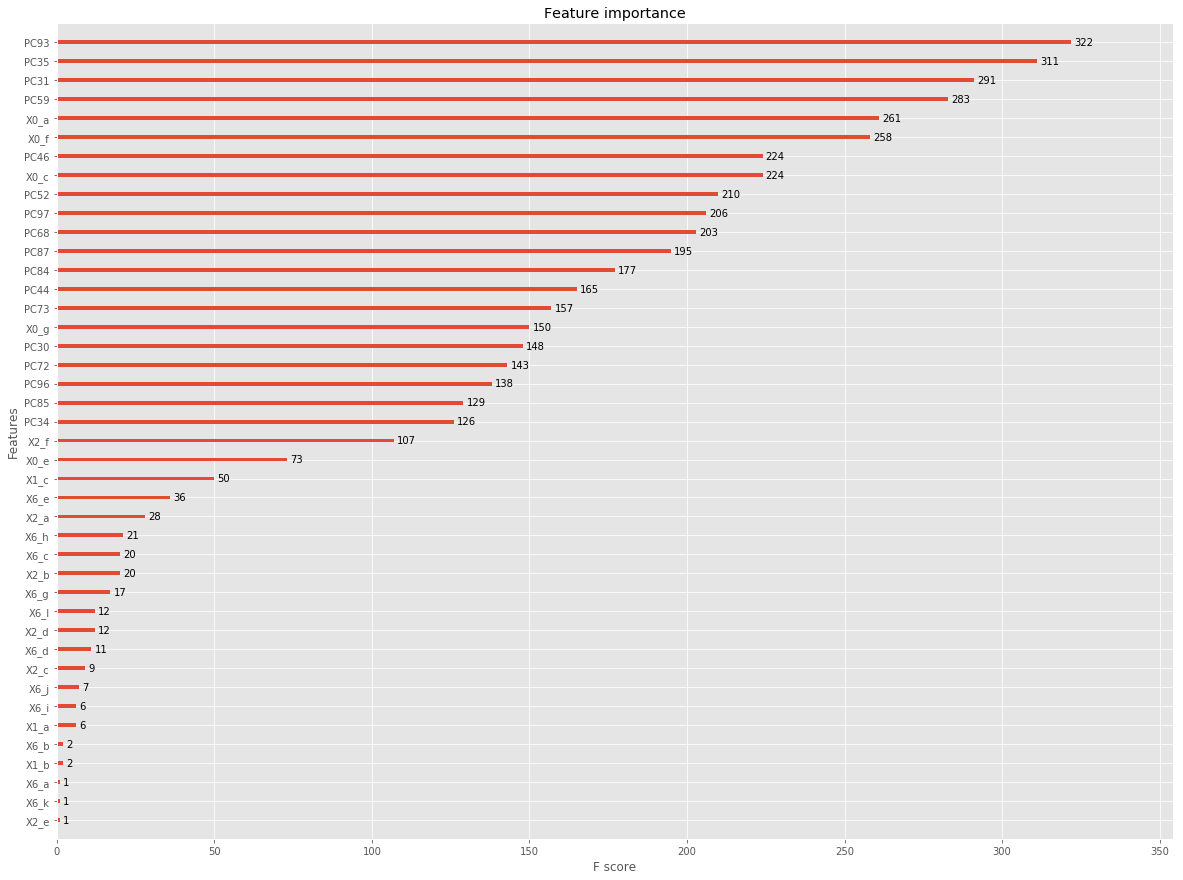

In [321]:
fig, ax = plt.subplots(figsize=(20, 15))
xgb.plot_importance(xgb_grid.best_estimator_, ax=ax)

### Submission

In [322]:
submission= pd.DataFrame({'ID':test['ID'],'y':y_pred})

In [323]:
export_csv = submission.to_csv ('/Users/rouzbehrahimi/desktop/IE-BD/kaggle/Mercedes_Benz/S7.csv', index = None, header=True)